In [ ]:
!pip install spacy
!pip install newsapi-python

In [ ]:
!python -m spacy download en_core_web_lg

     |████████████████████████████████| 827.9 MB 1.2 MB/s 
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [ ]:
import spacy
from newsapi import NewsApiClient
nlp_eng = spacy.load('en_core_web_lg')
newsapi = NewsApiClient (api_key='8b3a8e220f524ab2a2ad5509c8bfb3bc')

In [ ]:
temp = newsapi.get_everything(q='coronavirus', language='en', from_param='2021-09-22', to='2021-10-21', sort_by='relevancy', page_size=100)
print(temp)

{'status': 'ok', 'totalResults': 42010, 'articles': [{'source': {'id': None, 'name': 'New York Times'}, 'author': 'Emma G. Fitzsimmons, Joseph Goldstein and Sharon Otterman', 'title': "New York City Mandates Vaccines for Its Workers to ‘End the Covid Era'", 'description': 'Mayor Bill de Blasio says 46,000 unvaccinated city workers must get a coronavirus shot by November or lose their paychecks.', 'url': 'https://www.nytimes.com/2021/10/20/nyregion/nyc-vaccine-mandate.html', 'urlToImage': 'https://static01.nyt.com/images/2021/10/20/nyregion/20nymandate/20nymandate-facebookJumbo.jpg', 'publishedAt': '2021-10-20T20:50:14Z', 'content': 'Gregory Floyd, president of Teamsters Local 237, which represents approximately 7,400 employees in the public housing system, where just six in 10 workers are vaccinated, said he believes many worker… [+1725 chars]'}, {'source': {'id': None, 'name': 'New York Times'}, 'author': 'The New York Times', 'title': 'Most U.S. Health Workers Comply With Vaccine Man

In [ ]:
import pickle
filename = 'articlesCOVID.pckl'
pickle.dump(temp['articles'], open(filename, 'wb'))

In [ ]:
filename = 'articlesCOVID.pckl'
loaded_model = pickle.load(open(filename, 'rb'))

In [ ]:
filepath = '/content/articlesCOVID.pckl'
pickle.dump(loaded_model, open(filepath, 'wb'))

In [ ]:
dados = []
for i, article in enumerate(temp):
    for x in temp['articles']:
        titles = x['title']
        date = x['publishedAt']
        descriptions = x['description']
        content = x['content']
        dados.append({'title':titles, 'date':date[:10], 'time': date[11:19], 'desc':descriptions, 'content':content})

In [ ]:
import pandas as pd
df = pd.DataFrame(dados)
df = df.dropna()
df.head()

,title,date,time,desc,content
0,New York City Mandates Vaccines for Its Worker...,2021-10-20,20:50:14,"Mayor Bill de Blasio says 46,000 unvaccinated ...","Gregory Floyd, president of Teamsters Local 23..."
1,Most U.S. Health Workers Comply With Vaccine M...,2021-09-29,09:24:17,Although some have quit their jobs rather than...,Hundreds of sought-after nurses are leaving so...
2,Experts Call for U.S. Vaccination Push as Cold...,2021-10-08,10:02:38,Experts say that steady inoculation rates are ...,"LiveUpdated Oct. 8, 2021, 5:56 a.m. ET\r\nOct...."
3,New York Hospitals Face Possible Mass Firings ...,2021-09-24,21:01:26,"With a Monday deadline looming, thousands of h...",New York States vaccination requirement for he...
4,The State of the Pandemic,2021-10-07,10:00:07,What can the U.S. expect from the coronavirus ...,Apoorva Mandavilli contributed reporting.\r\nT...


In [119]:
import string
pos_tag = ('VERB', 'NOUN', 'PROPN')
def get_keywords_eng(content):
    result = []
    for token in content:
      if (token.text in nlp_eng.Defaults.stop_words or token.text in string.punctuation):
        continue
      if (token.pos_ in pos_tag):
        result.append(token.text)

    return result

In [121]:
from collections import Counter
results = []
for content in df.content:
  doc = nlp_eng(content)
  results.append([('#' + x[0]) for x in Counter(get_keywords_eng(doc)).most_common(5)])
df['keywords'] = results
df.to_csv('DataFrameFile.csv')

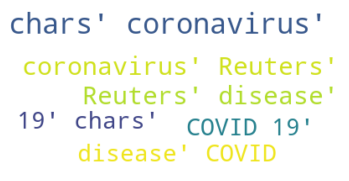

In [ ]:
import numpy
import pandas
import matplotlib.pyplot as plt
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
text = str(results)
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()